In [44]:
#load libraries
import pandas as pd               
import matplotlib                
import matplotlib.pyplot as plt  
import seaborn as sns             
import datetime as dt             
import numpy as np
import folium
import plotly.express as px

## Data Inspection

In [45]:
#Read the data file from Github
covid19_country_data=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')
confirmed_data=pd.read_csv('https://raw.githubusercontent.com/gopisuthar/Covid_19/DataAnalysis/Resources/covid19_Confirmed.csv')
recovered_data=pd.read_csv('https://raw.githubusercontent.com/gopisuthar/Covid_19/DataAnalysis/Resources/covid19_Recovered.csv')
death_data=pd.read_csv('https://raw.githubusercontent.com/gopisuthar/Covid_19/DataAnalysis/Resources/covid19_Deaths.csv')

#Examine head of each file
covid19_country_data.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-05-06 02:32:31,-25.0000,133.0000,6875,97,5975,803,27.003460,NaN,NaN,1.410909,36,AUS
1,Austria,2020-05-06 02:32:31,47.5162,14.5501,15650,606,13462,1582,173.765322,NaN,NaN,3.872204,40,AUT
2,Canada,2020-05-06 02:32:31,60.0010,-95.0010,63215,4190,27006,32019,166.989375,NaN,NaN,6.628174,124,CAN
3,China,2020-05-06 02:32:31,30.5928,114.3055,83968,4637,78870,461,5.977747,NaN,NaN,5.522342,156,CHN
4,Denmark,2020-05-06 02:32:31,56.0000,10.0000,10019,503,7492,2024,172.973910,NaN,NaN,5.020461,208,DNK


In [46]:
confirmed_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,40,40,74,84,94,110,110,120,170,174
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,201,230,264,302,367,409,454,511,584,716
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7


In [47]:
death_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,2,4,4,4,4,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,4,5,5,6,8,10,10,11,15
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,17,17,19,21,25,26,29,31,35,44
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,3,3,3,6,8,12
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2


In [48]:
recovered_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,2,5
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,10,17,17,31,31,33,44,52
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,65,65,24,65,29,29,31,31,37,46
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,10,10
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
confirmed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 74 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  79 non-null     object 
 1   Country/Region  256 non-null    object 
 2   Lat             256 non-null    float64
 3   Long            256 non-null    float64
 4   1/22/20         256 non-null    int64  
 5   1/23/20         256 non-null    int64  
 6   1/24/20         256 non-null    int64  
 7   1/25/20         256 non-null    int64  
 8   1/26/20         256 non-null    int64  
 9   1/27/20         256 non-null    int64  
 10  1/28/20         256 non-null    int64  
 11  1/29/20         256 non-null    int64  
 12  1/30/20         256 non-null    int64  
 13  1/31/20         256 non-null    int64  
 14  2/1/20          256 non-null    int64  
 15  2/2/20          256 non-null    int64  
 16  2/3/20          256 non-null    int64  
 17  2/4/20          256 non-null    int

In [50]:
death_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 74 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  79 non-null     object 
 1   Country/Region  256 non-null    object 
 2   Lat             256 non-null    float64
 3   Long            256 non-null    float64
 4   1/22/20         256 non-null    int64  
 5   1/23/20         256 non-null    int64  
 6   1/24/20         256 non-null    int64  
 7   1/25/20         256 non-null    int64  
 8   1/26/20         256 non-null    int64  
 9   1/27/20         256 non-null    int64  
 10  1/28/20         256 non-null    int64  
 11  1/29/20         256 non-null    int64  
 12  1/30/20         256 non-null    int64  
 13  1/31/20         256 non-null    int64  
 14  2/1/20          256 non-null    int64  
 15  2/2/20          256 non-null    int64  
 16  2/3/20          256 non-null    int64  
 17  2/4/20          256 non-null    int

In [51]:
recovered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 74 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  64 non-null     object 
 1   Country/Region  242 non-null    object 
 2   Lat             242 non-null    float64
 3   Long            242 non-null    float64
 4   1/22/20         242 non-null    int64  
 5   1/23/20         242 non-null    int64  
 6   1/24/20         242 non-null    int64  
 7   1/25/20         242 non-null    int64  
 8   1/26/20         242 non-null    int64  
 9   1/27/20         242 non-null    int64  
 10  1/28/20         242 non-null    int64  
 11  1/29/20         242 non-null    int64  
 12  1/30/20         242 non-null    int64  
 13  1/31/20         242 non-null    int64  
 14  2/1/20          242 non-null    int64  
 15  2/2/20          242 non-null    int64  
 16  2/3/20          242 non-null    int64  
 17  2/4/20          242 non-null    int

In [52]:
confirmed_data.shape

(256, 74)

In [53]:
recovered_data.shape

(242, 74)

In [54]:
death_data.shape

(256, 74)

## Data Preprocessing

In [55]:
#Let rename the columns for consistency
confirmed_data=confirmed_data.rename(columns={'Province/State':'State','Country/Region':'Country'})
recovered_data=recovered_data.rename(columns={'Province/State':'State','Country/Region':'Country'})
death_data=death_data.rename(columns={'Province/State':'State','Country/Region':'Country'})
covid19_country_data=covid19_country_data.rename(columns={'Country_Region':'Country'})

In [56]:
#Let the rename country name for consistency
#change US to USA
confirmed_data.loc[confirmed_data['Country'] == 'US','Country'] = 'USA'
recovered_data.loc[confirmed_data['Country']=='US','Country'] = 'USA'
death_data.loc[confirmed_data['Country']=='US','Country'] = 'USA'

#change Korea, south to Korea
confirmed_data.loc[confirmed_data['Country']=='Korea, South','Country'] = 'South Korea'
recovered_data.loc[confirmed_data['Country']=='Korea, South','Country'] = 'South Korea'
death_data.loc[confirmed_data['Country']=='Korea, South','Country'] = 'South Korea'

#change Taiwan* to Taiwan
confirmed_data.loc[confirmed_data['Country']=='Taiwan*','Country'] = 'Taiwan'
recovered_data.loc[confirmed_data['Country']=='Taiwan*','Country'] = 'Taiwan'
death_data.loc[confirmed_data['Country']=='Taiwan*','Country'] = 'Taiwan'

In [57]:
#double check to ensure changes 

confirmed_data.loc[confirmed_data['Country']=='Taiwan']

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
207,NaN,Taiwan,23.7,121.0,1,1,3,3,4,5,...,169,195,215,235,252,267,283,298,306,322


In [58]:
confirmed_data.loc[confirmed_data['Country']=='USA']

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
225,NaN,USA,37.0902,-95.7129,1,1,2,2,5,5,...,33276,43847,53740,65778,83836,101657,121478,140886,161807,188172


In [59]:
confirmed_data.loc[confirmed_data['Country']=='South Korea']

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
143,NaN,South Korea,36.0,128.0,1,1,2,2,3,4,...,8961,8961,9037,9137,9241,9332,9478,9583,9661,9786


## Data Analysis

In [60]:
#Examine Global Cases

covid19_total=covid19_country_data.copy().drop(['Country','Last_Update','Lat','Long_','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','UID','ISO3'],axis=1)
global_data = pd.DataFrame(covid19_total.sum())
global_data = global_data.rename(columns={0: 'Global COVID-19 Cases'})
global_data

,Global COVID-19 Cases
Confirmed,3662691
Deaths,257239
Recovered,1198832
Active,2235650


In [61]:
#Examine the cases by top 10 countries by number of confirmed cases 
country_data = covid19_country_data.drop(['ISO3','UID','People_Hospitalized','People_Tested','Last_Update','Incident_Rate','Lat', 'Long_'], axis=1)

country_data.sort_values('Confirmed', ascending=False)[:10].set_index('Country').style.background_gradient(cmap= 'Blues', subset=['Confirmed']).background_gradient(cmap= 'OrRd', subset=['Deaths']).background_gradient(cmap= 'Greens', subset=['Recovered']).background_gradient(cmap= 'Purples', subset=['Active'])

,Confirmed,Deaths,Recovered,Active,Mortality_Rate
Country,,,,,
US,1204351,71064,189791,972526,5.900605
Spain,219329,25613,123486,70230,11.677890
Italy,213013,29315,85231,98467,13.762071
United Kingdom,196243,29501,926,165816,15.032893
France,170687,25537,52842,92308,14.961303
Germany,167007,6993,135100,24914,4.187250
Russia,155370,1451,19865,134054,0.933900
Turkey,129491,3520,73285,52686,2.718336
Brazil,115455,7938,48221,59296,6.875406


In [62]:
#Examine the cases by top 5 countries by number of deaths
country_data.sort_values('Deaths', ascending=False)[:5].set_index('Country').style.background_gradient(cmap= 'Blues', subset=['Confirmed']).background_gradient(cmap= 'OrRd', subset=['Deaths']).background_gradient(cmap= 'Greens', subset=['Recovered']).background_gradient(cmap= 'Purples', subset=['Active']).background_gradient(cmap= 'Greys', subset=['Mortality_Rate'])

,Confirmed,Deaths,Recovered,Active,Mortality_Rate
Country,,,,,
US,1204351,71064,189791,972526,5.900605
United Kingdom,196243,29501,926,165816,15.032893
Italy,213013,29315,85231,98467,13.762071
Spain,219329,25613,123486,70230,11.677890
France,170687,25537,52842,92308,14.961303


In [63]:
#Extract Confirmed cases over 10000

country_over_10000 = country_data.loc[country_data['Confirmed'] > 10000]
country_over_10000 = country_over_10000.sort_values('Mortality_Rate', ascending= False)
country_over_10000 = country_over_10000.set_index('Country')
country_over_10000

,Confirmed,Deaths,Recovered,Active,Mortality_Rate
Country,,,,,
Belgium,50509,8016,12441,30052,15.870439
United Kingdom,196243,29501,926,165816,15.032893
France,170687,25537,52842,92308,14.961303
Italy,213013,29315,85231,98467,13.762071
Netherlands,41286,5185,139,35962,12.558737
Sweden,23216,2854,4074,16288,12.293246
Spain,219329,25613,123486,70230,11.677890
Mexico,26025,2507,16810,6708,9.633045
Indonesia,12071,872,2197,9002,7.223925


In [64]:
#Make new dataframe to set index as 'Country'

country_data_sorted=pd.DataFrame(country_data.set_index('Country'))
country_data_sorted.head()

,Confirmed,Deaths,Recovered,Active,Mortality_Rate
Country,,,,,
Australia,6875,97,5975,803,1.410909
Austria,15650,606,13462,1582,3.872204
Canada,63215,4190,27006,32019,6.628174
China,83968,4637,78870,461,5.522342
Denmark,10019,503,7492,2024,5.020461


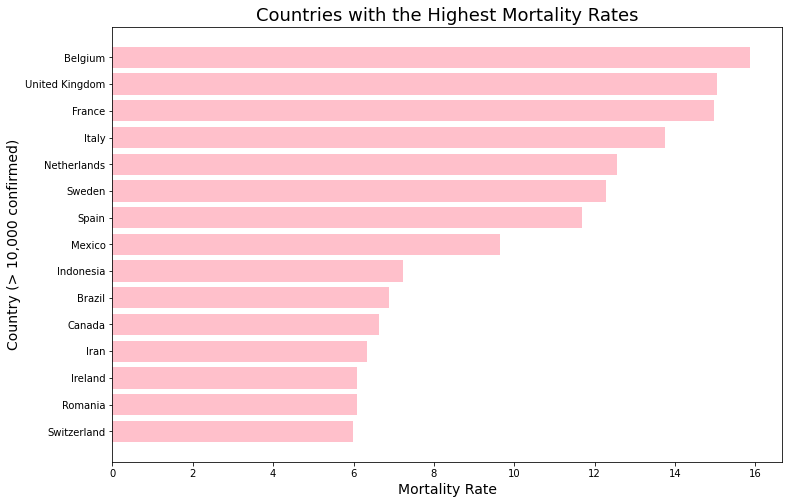

In [65]:
#Bar graph shows Highest Mortality Rates

fig = plt.figure(figsize=(12,8))
fig.add_subplot()

plt.barh(country_over_10000.sort_values('Mortality_Rate')['Mortality_Rate'].index[-15:], country_over_10000.sort_values('Mortality_Rate')['Mortality_Rate'].values[-15:], color='pink')
plt.title('Countries with the Highest Mortality Rates', fontsize = 18)
plt.xlabel('Mortality Rate', fontsize=14)
plt.ylabel('Country (> 10,000 confirmed)', fontsize=14)

plt.show()


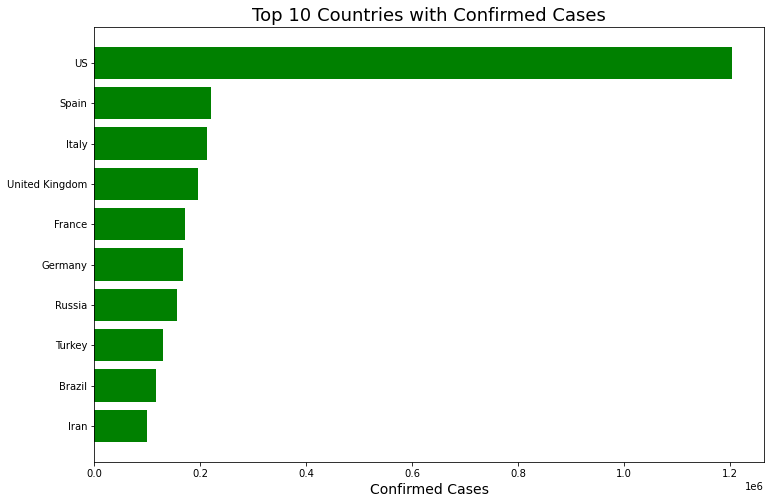

In [66]:
#Bar graph shows top 10 Countries with Confirmed Cases

fig = plt.figure(figsize=(12,8))
fig.add_subplot()

plt.barh(country_data_sorted.sort_values('Confirmed')['Confirmed'].index[-10:], 
         country_data_sorted.sort_values('Confirmed')['Confirmed'].values[-10:], color='Green')
plt.xlabel('Confirmed Cases', fontsize=14)
plt.title('Top 10 Countries with Confirmed Cases', fontsize=18)

plt.show()

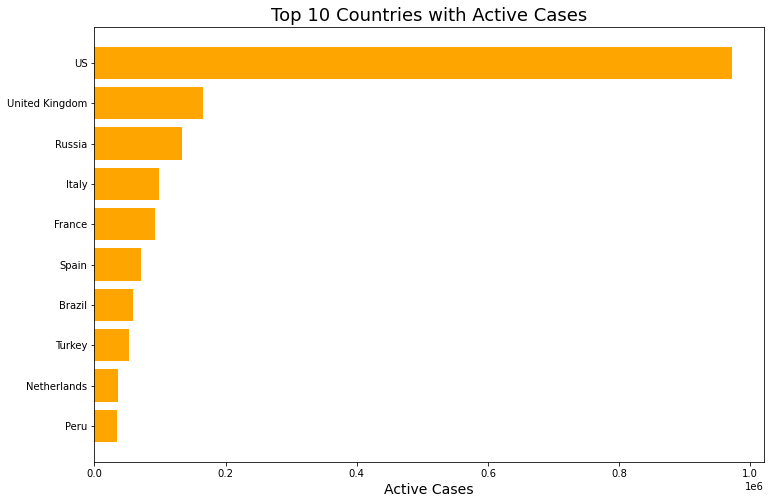

In [67]:
#Bar graph shows top 10 Countries with Active Cases

fig = plt.figure(figsize=(12,8))
fig.add_subplot()

plt.barh(country_data_sorted.sort_values('Active')['Active'].index[-10:], 
         country_data_sorted.sort_values('Active')['Active'].values[-10:], color='Orange')
plt.xlabel('Active Cases', fontsize=14)
plt.title('Top 10 Countries with Active Cases', fontsize=18)

plt.show()

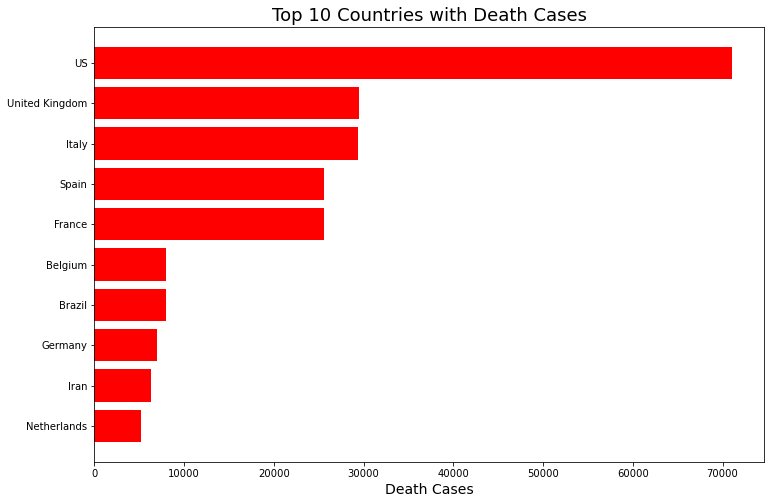

In [68]:
#Bar graph shows top 10 Countries with Death Cases

fig = plt.figure(figsize=(12,8))
fig.add_subplot()

plt.barh(country_data_sorted.sort_values('Deaths')['Deaths'].index[-10:], 
         country_data_sorted.sort_values('Deaths')['Deaths'].values[-10:], color='Red')
plt.xlabel('Death Cases', fontsize=14)
plt.title('Top 10 Countries with Death Cases', fontsize=18)

plt.show()

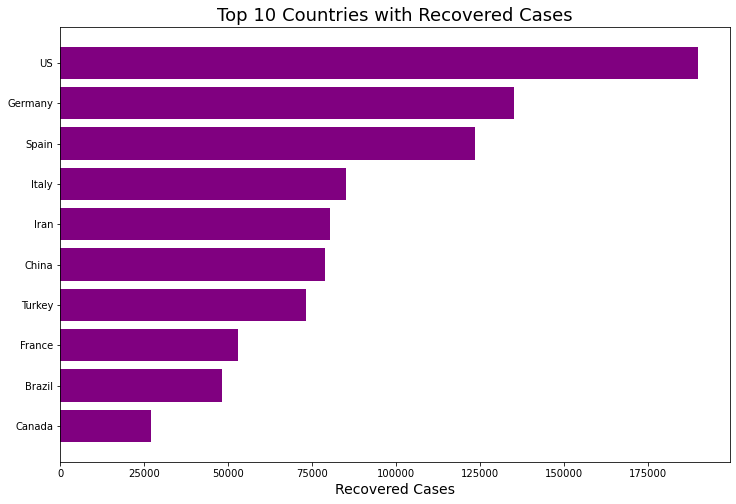

In [69]:
#Bar graph shows top 10 Countries with Recovered Cases

fig = plt.figure(figsize=(12,8))
fig.add_subplot()

plt.barh(country_data_sorted.sort_values('Recovered')['Recovered'].index[-10:], 
         country_data_sorted.sort_values('Recovered')['Recovered'].values[-10:], color='Purple')
plt.xlabel('Recovered Cases', fontsize=14)
plt.title('Top 10 Countries with Recovered Cases', fontsize=18)

plt.show()

## Map Visualization

In [70]:
global_covid19_map = folium.Map(location=[10,0], tiles='OpenStreetMap', zoom_start=2)

#Shows the Magnitude of Confirmed Cases and also calculated Mortality Rate

for i in range(0, len(confirmed_data)):
    folium.Circle(
        location=[confirmed_data.iloc[i]['Lat'], confirmed_data.iloc[i]['Long']],
                  tooltip = "<h5 style= 'text-align:center;font-weight: bold'>" +
                confirmed_data.iloc[i]['Country'] + "</h5>" + "<div style='text-align:center;'>"+str(np.nan_to_num(confirmed_data.iloc[i]['State']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #44;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(confirmed_data.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(death_data.iloc[i, -1])+"</li>" + 
        "<li>Mortality Rate:   "+str(np.round(death_data.iloc[i,-1]/(confirmed_data.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>"
        , radius=(int((np.log(confirmed_data.iloc[i,-1] + 1.00001)))+ 0.2) * 50000,
        color='blue',
        fill_color = 'blue',
        fill_opacity = 0.5, 
        fill=True).add_to(global_covid19_map)
    
global_covid19_map

In [71]:
#For Scatter, remove 'Country' as Index

covid19_country=covid19_country_data.copy().drop(['Lat','Long_','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','UID','ISO3'],axis=1)
covid19_country['Last_Update'] = pd.to_datetime(covid19_country['Last_Update']).dt.strftime('%m/%d/%Y')
covid19_country.head()

,Country,Last_Update,Confirmed,Deaths,Recovered,Active
0,Australia,05/06/2020,6875,97,5975,803
1,Austria,05/06/2020,15650,606,13462,1582
2,Canada,05/06/2020,63215,4190,27006,32019
3,China,05/06/2020,83968,4637,78870,461
4,Denmark,05/06/2020,10019,503,7492,2024


In [72]:
#Geographical Scatter Plotting of Last Updated Confirmed Cases over the World

scatter_map_data = px.scatter_geo(covid19_country, locations ='Country',
                            locationmode='country names',
    color=np.power(covid19_country['Confirmed'], 0.3) -2,
    hover_name='Country',
    hover_data = ['Confirmed'], 
    projection='natural earth',
    animation_frame='Last_Update',
    title='Last Updated Confirmed Cases of COVID-19')

scatter_map_data.update_coloraxes(colorscale='hot')
scatter_map_data.update(layout_coloraxis_showscale=False)
scatter_map_data.show()